Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


a. Sample Space is: {Strawberry, Blueberry, Cinnamon}

b. Probability of A is 0.5. Probability of B is 0.75.

c. No, they are not mutually exclusive because they have a common outcome (drawing strawberry-flavoured jelly beans) in between them.

 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [ ]:
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.4/468.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: arviz
    Found existi

In [ ]:
# Import necessary libraries
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math

In [ ]:
def P(S, A, Prob): # A = event , S = sample space, P= Probability
    if set(A).issubset(set(S)): # set A is an event
        return sum(Prob[i] for i in A)
    else:
        return 0

In [ ]:
S= {'Strawberry','Blueberry','Cinnamon'}
A= {'Strawberry'}
B= {'Strawberry','Blueberry'}

Prob= {'Strawberry':2/4,'Blueberry':1/4,'Cinnamon':1/4}

print("P(A):" , P(S,A,Prob))
print("P(B):" , P(S,B,Prob))

P(A): 0.5
P(B): 0.75


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

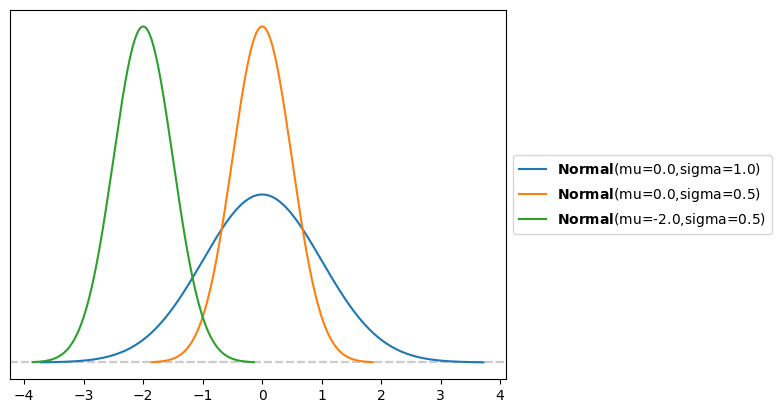

In [ ]:
mus = [0., 0., -2.]
sigmas = [1, 0.5, 0.5]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

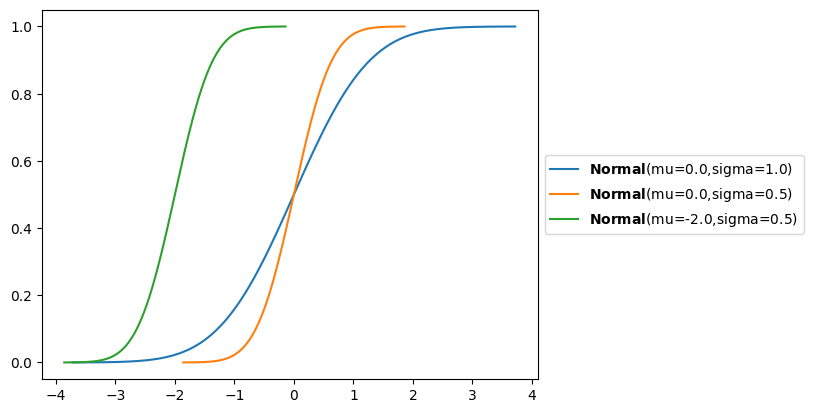

In [ ]:
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_cdf()

interactive(children=(FloatSlider(value=2.0, description='mu (-inf, inf)', max=12.0, min=-8.0, style=SliderSty…

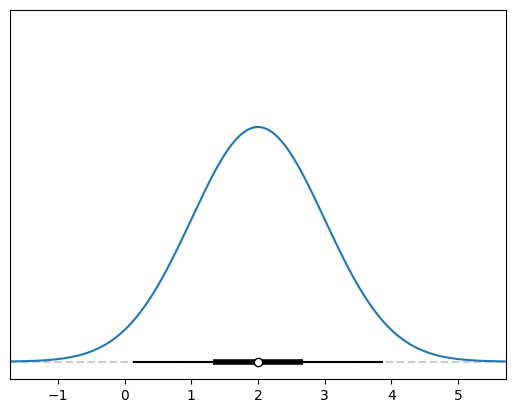

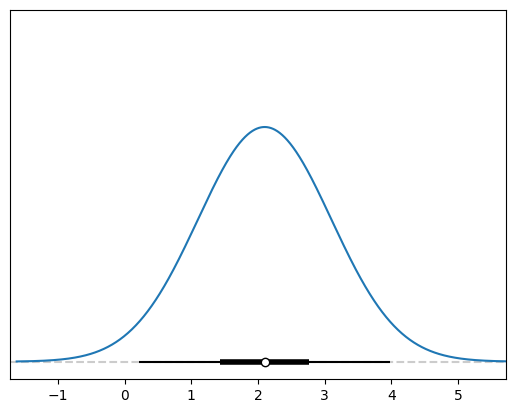

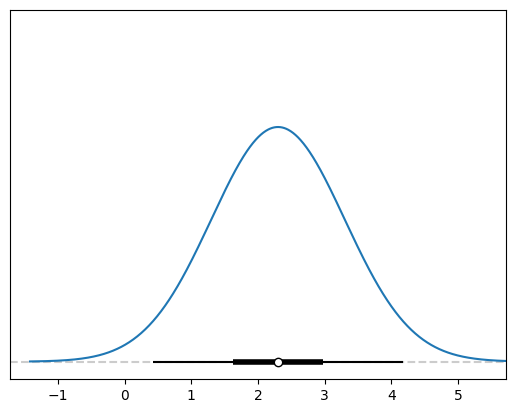

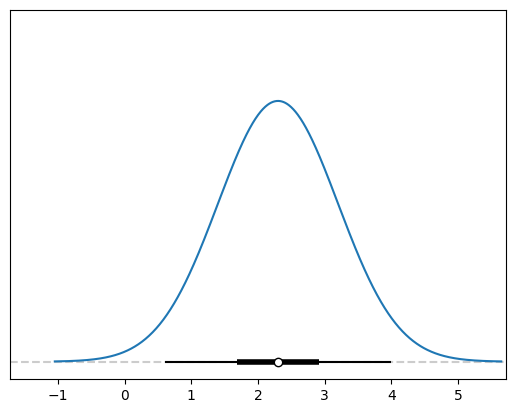

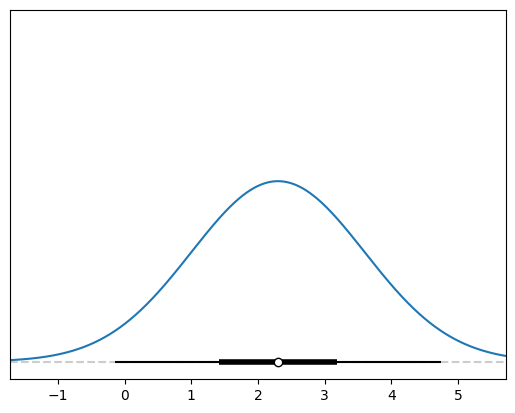

In [ ]:
pz.Normal(mu=2, sigma=1).plot_interactive()

<Axes: >

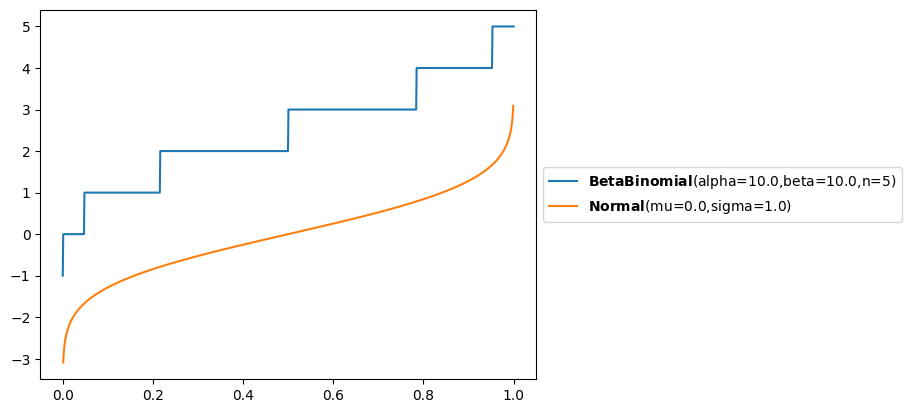

In [ ]:
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_ppf() #BetaBinomial
pz.Normal(0, 1).plot_ppf() #Gaussian

How ppf, pdf, cdf are related:
The ppf is the inverse of the cdf. While the cdf gives the probability that a random variable is less than or equal to a specified point, the ppf gives the point for which a certain probability is less than or equal to.  The ppf is derived from the cdf, which in turn is derived from the pdf/pmf.  

Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

In [ ]:
dist1= pz.SkewNormal(0, 1, 2)
dist2= pz.SkewNormal(1, 2, 2)

In [ ]:
dist1.summary()

SkewNormal(mean=0.71, median=0.66, std=0.7, lower=-0.46, upper=2.17)

In [ ]:
summary= dist1.summary()
theo_mean1 = summary[0]
theo_var1= (summary[2])**0.5
summary2= dist2.summary()
theo_mean2 = summary2[0]
theo_var2= (summary2[2])**0.5
print(f"Theoretical Values for parameters 1 : Mean = {theo_mean1}, Variance = {theo_var1}")
print(f"Theoretical Values for parameters 2 : Mean = {theo_mean2}, Variance = {theo_var2}")

Theoretical Values for parameters 1 : Mean = 0.71, Variance = 0.8366600265340756
Theoretical Values for parameters 2 : Mean = 2.43, Variance = 1.1832159566199232


So, mean and variance are different than the ones specified using the parameters. I'll compare the values generated using random samples with the ones reported by dist.summary().

In [ ]:
rvs_sizes = [10, 100, 1000]
results1 = {}
results2={}

In [ ]:
def rvsmoments(sample):
  mean = np.mean(sample)
  variance= np.var(sample)
  return mean,variance

In [ ]:
print("For parameters 1")
for i in rvs_sizes:
  sample= dist1.rvs(i)
  mean, var= rvsmoments(sample)
  results1[i]= (mean, var)
  print(f"Sample size {i}: Mean = {mean}, Variance = {var}")


For parameters 1
Sample size 10: Mean = 0.474526354051095, Variance = 0.2833064025439392
Sample size 100: Mean = 0.6740605284309544, Variance = 0.4639788457168665
Sample size 1000: Mean = 0.7621359864231787, Variance = 0.5138894040041592


In [ ]:
print("For parameters 2")
for i in rvs_sizes:
  sample2= dist2.rvs(i)
  mean, var= rvsmoments(sample2)
  results2[i]= (mean, var)
  print(f"Sample size {i}: Mean = {mean}, Variance = {var}")

For parameters 2
Sample size 10: Mean = 1.88994809663046, Variance = 1.752344730918031
Sample size 100: Mean = 2.5077129038817993, Variance = 1.9490775610275357
Sample size 1000: Mean = 2.4328088437299136, Variance = 1.9357151720179477


OBSERVATIONS:
Mean is closest to theoretical mean for sample size of 1000. Variance is very hard to recover. For first combination of parameters, it is 0.514 for sample size of 1000 (theoretical being 0.837). For second combination of parameters, it is closest for sample size of 10 (1.752, theoretical being 1.183).